In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import statsmodels.api as sm

In [3]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'HousingData.csv'
X = pd.read_csv(fname)

In [4]:
X = X.dropna(axis = 0, how = 'any')
X = X.reset_index(drop = True)
Nrow, Ncol = X.shape

We will now try to predict per capita crime rate using the other variables in this data set.  
15 - (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response?

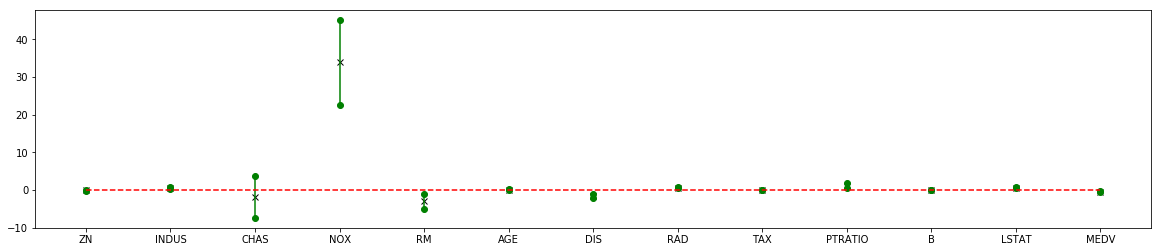

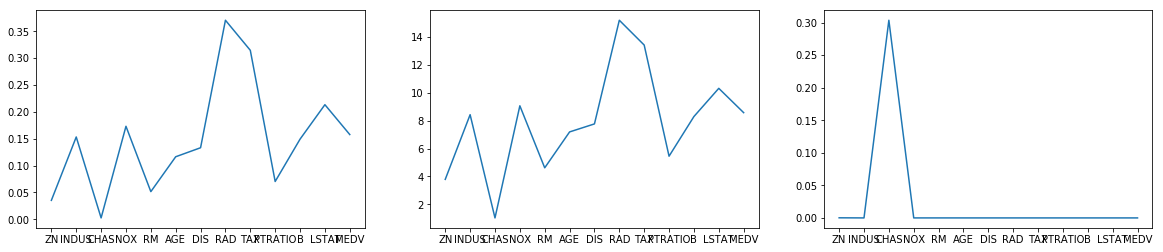

In [5]:
xaxis = X.columns.values.tolist()
xaxis.remove('CRIM')
yy = X.CRIM.copy()

Rsqrs = []; tvals = []; pvals = []
beta0s = []
plt.figure(figsize=(20,4))
for icol in X.columns.values:
    if icol == 'CRIM': continue # this is the response 
    xx = sm.add_constant(X[icol]) # OLS does not include intercept by default
    
    results = sm.OLS(yy, xx).fit()
    Rsqrs.append(results.rsquared)
    tvals.append(results.tvalues[icol])
    pvals.append(results.pvalues[icol])
    beta0s.append(results.params[icol])
    
    plt.plot(icol, results.params[icol], 'xk')
    plt.plot([icol, icol], [results.params[icol] - 3 * results.bse[icol], results.params[icol] + 3 * results.bse[icol]], '-og')
plt.plot([xaxis[0], xaxis[-1]], [0, 0], '--r')

plt.figure(figsize = (20, 4))
plt.subplot(1, 3, 1)
plt.plot(xaxis, Rsqrs)
plt.subplot(1, 3, 2)
plt.plot(xaxis, np.abs(tvals))
plt.subplot(1, 3, 3)
plt.plot(xaxis, pvals)

15 - (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [6]:
yy = X.CRIM.copy()
xx = sm.add_constant(X.drop(['CRIM'], axis = 1))
results = sm.OLS(yy, xx).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     22.88
Date:                Mon, 27 Aug 2018   Prob (F-statistic):           2.84e-40
Time:                        21:35:20   Log-Likelihood:                -1319.1
No. Observations:                 394   AIC:                             2666.
Df Residuals:                     380   BIC:                             2722.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9181      9.196      2.166      0.0

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

(-4.837686113054168, 35.69987090787917, -13.87864100269092, 1.4158267117815582)

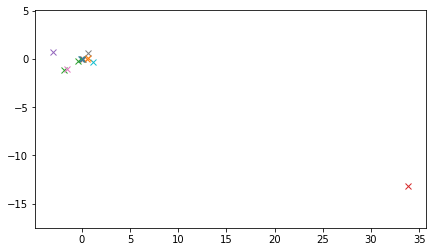

In [7]:
plt.figure(figsize = (7, 4))
cnt = 0
for i in xaxis:
    plt.plot(beta0s[cnt], results.params[i], 'x')
    cnt += 1
plt.axis('equal')

15 - (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 +β1X +β2X2 +β3X3 +ε.

Text(0.5,1,'p-value')

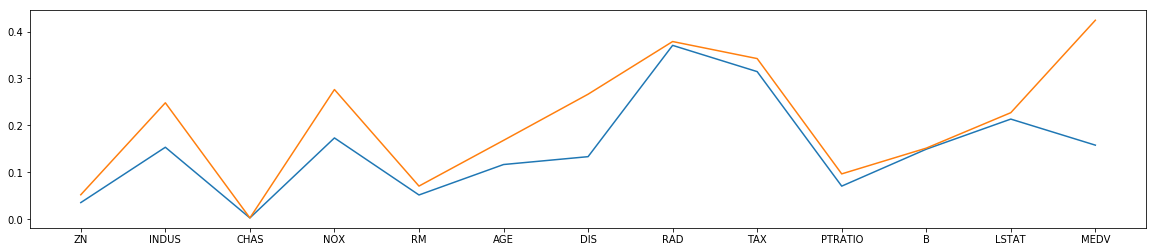

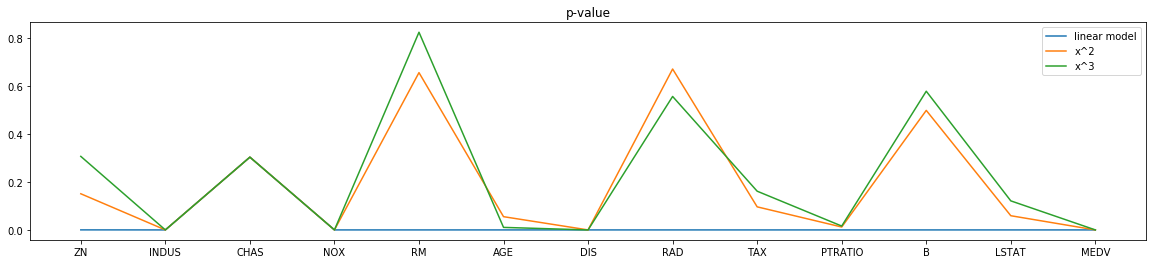

In [8]:
yy = X.CRIM.copy()

Rsqrs2 = []
pvals2 = []; pvals3 = []
for icol in X.columns.values:
    if icol == 'CRIM': continue # this is the response 
    iformula = 'CRIM ~ 1'
    for ipower in range(1, 4):
        iformula += ' + np.power(' + icol + ',' + str(ipower) + ')'
    results = sm.OLS.from_formula(formula = iformula, data = X).fit()
    Rsqrs2.append(results.rsquared)
    pvals2.append(results.pvalues.iloc[2])
    pvals3.append(results.pvalues.iloc[3])

plt.figure(figsize = (20, 4))
plt.plot(xaxis, Rsqrs)
plt.plot(xaxis, Rsqrs2)
plt.figure(figsize = (20, 4))
plt.plot(xaxis, pvals, label = 'linear model')
plt.plot(xaxis, pvals2, label = 'x^2')
plt.plot(xaxis, pvals3, label = 'x^3')
plt.legend()
plt.title('p-value')